In [1]:
from IPython.display import display, Image
print("슝=3")

슝=3


In [2]:
import pandas as pd
print("슝=3")

슝=3


In [3]:
macbook = pd.read_csv('~/aiffel/bike_regression/data/macbook.csv')
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


In [4]:
# 데이터시각화
import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해준다.
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.
print("슝=3")

슝=3


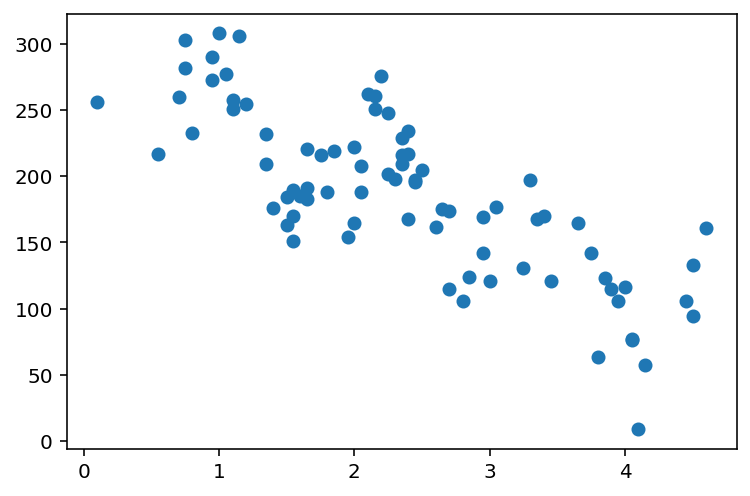

In [5]:
# x축에는 사용연수(used_years), y축에는 중고가(price)
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

### 상관관계
Pearson 상관 계수로 표현한다.
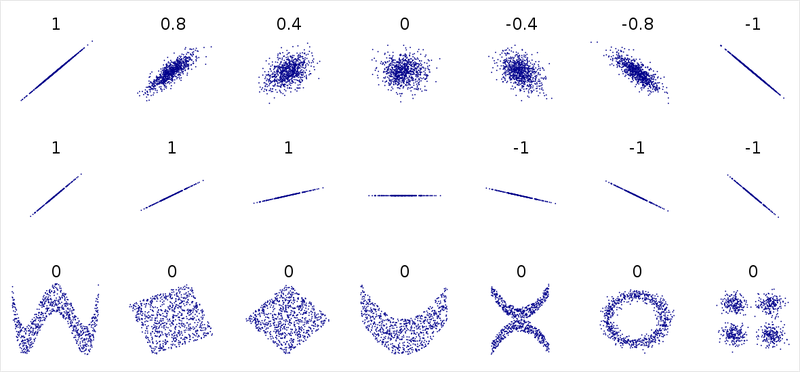

상관관계가 없으면 상관계수는 0이고, 상관관계가 높으면 상관관계의 절대값이 커진다.
상관계수가 +이면 데이터 분포의 기울기가 양이고, 한 변수가 커질수록 다른 변수의 값이 커진다. 상관계수가 -이면 데이터분포의 기울기가 음이고, 한변수가 커질수록 다른 변수가 작아진다.
데이터분포가 직선에 가까울수록 -1또는 1에 가까워지고, 데이터분포가 넓게 퍼지며 원에 가까워질수록 상관계수의 값은 0에 가까워진다.


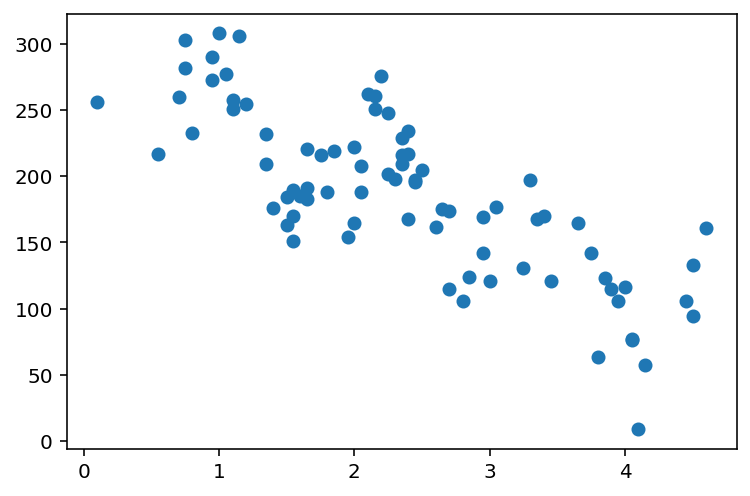

In [6]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

### 상관계수 구하기

In [7]:
import numpy as np

# 상관계수를 구하는 함수 np.corrcoef(x,y)를 사용
np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

상관계수는 약 -0.79 정도로 강한 음의 상관계수를 보였다.

### 모델 만들기

* 모델(model) : 특정정보를 입력받아서 그 정보에 따라 원하는 값을 예측하여 값을 출력하는 함수

x에 used_years 정보 입력, y에는 출력에 해당하는 price 정보를 담는다.


In [8]:
x = macbook["used_years"].values
y = macbook["price"].values
print("슝=3")

슝=3


### 일차함수 모델

* 기울기 : w
* y절편 : b

In [9]:
def model(x,w,b):
    y = w * x + b
    return y
print("슝=3")

슝=3


In [10]:
# y=2x + 1 함수에 x=5 대입
model(x=5, w=2, b=1)

11

### 모델학습
모델학습 : 모델이 입력을 받았을 때 정답값에 가까운 출력을 낼 수 있는 최적의 '매개변수' 혹은 'parameter'를 찾는다, 방정식을 푼다


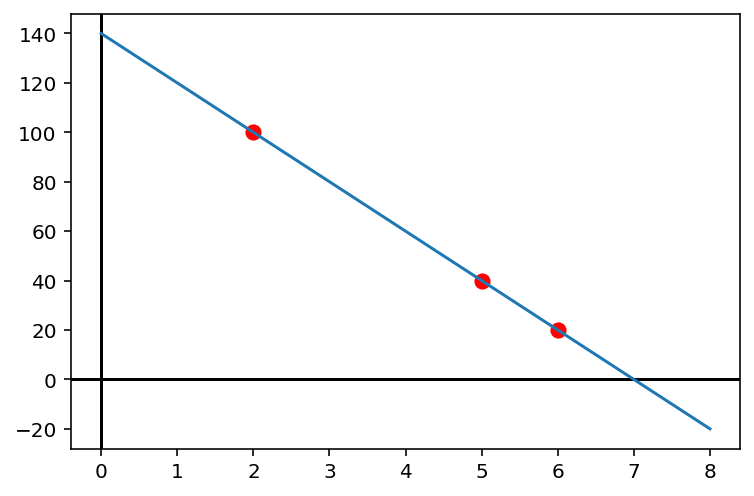

In [11]:
# y = -20x + 140, (2,100), (5, 40), (6, 20)

# x축, y축 그리기
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

# y = wx + b 일차함수 그리기
x = np.linspace(0, 8, 9)
y = model(x, w=-20, b=140) # y = -20x + 140
plt.plot(y)

# (x, y) 점찍기
x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='r', s=50)

plt.show()

### 오차를 최소화하는 모델

<function matplotlib.pyplot.show(close=None, block=None)>

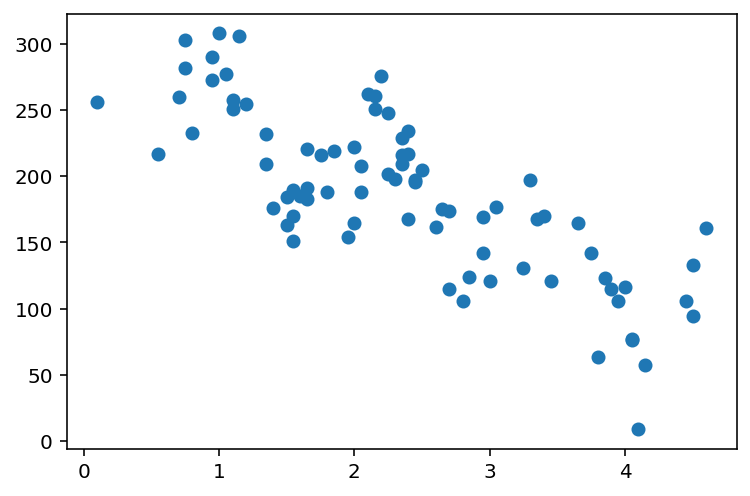

In [12]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show

y = wx + b 에서 최적의 직선, 추세선이 될 수 있는 w와 b를 찾는다.
w와 b는 매개변수, 파라미터 혹은 가중치라고 한다.
정확한 방정식이 아닌 최적의 방정식을 찾는다.

---
손실함수, 아직 불완전한 현재의 모델이 출력하는 값과 실제 정답간의 차이
1. 모델의 출력값과 실제 정답간의 차이를 계산
2. 그 차이를 단계적으로 줄여나가는 순서로 모델 학습

In [13]:
# 예시
w = 3.1
b = 2.3
print("슝=3")

슝=3


w와 b는 랜덤한 초깃값
y = 3.1x + 2.3

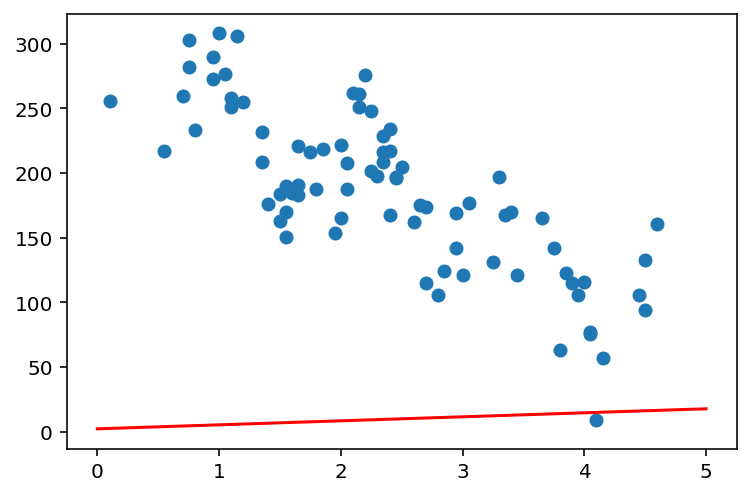

In [14]:
x = np.linspace(0, 5, 6)
y = model(x, w, b) # y = 3.1x + 2.3
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [15]:
# 맞지 않는직선
# used_years 출력

x = macbook["used_years"].values
x

array([2.65, 3.8 , 0.95, 4.5 , 4.45, 2.7 , 3.05, 2.25, 2.3 , 1.85, 1.5 ,
       0.95, 2.6 , 0.55, 2.05, 0.75, 3.95, 2.8 , 2.05, 1.15, 1.35, 3.35,
       1.35, 2.45, 2.4 , 0.1 , 3.45, 2.35, 0.7 , 1.05, 1.75, 4.1 , 4.5 ,
       4.  , 2.  , 2.45, 2.5 , 2.1 , 3.  , 4.05, 2.7 , 2.15, 3.3 , 2.4 ,
       2.85, 1.65, 1.55, 2.15, 3.4 , 1.55, 0.8 , 2.95, 2.4 , 1.4 , 1.65,
       2.25, 3.85, 3.9 , 4.6 , 2.35, 4.05, 1.2 , 1.95, 1.6 , 2.  , 1.8 ,
       3.75, 3.65, 2.35, 2.2 , 1.  , 4.15, 1.1 , 1.55, 2.95, 1.5 , 1.65,
       1.1 , 3.25, 0.75])

In [16]:
prediction = model(x, w, b) #현재는 w = 3.1, b = 2.3
prediction

array([10.515, 14.08 ,  5.245, 16.25 , 16.095, 10.67 , 11.755,  9.275,
        9.43 ,  8.035,  6.95 ,  5.245, 10.36 ,  4.005,  8.655,  4.625,
       14.545, 10.98 ,  8.655,  5.865,  6.485, 12.685,  6.485,  9.895,
        9.74 ,  2.61 , 12.995,  9.585,  4.47 ,  5.555,  7.725, 15.01 ,
       16.25 , 14.7  ,  8.5  ,  9.895, 10.05 ,  8.81 , 11.6  , 14.855,
       10.67 ,  8.965, 12.53 ,  9.74 , 11.135,  7.415,  7.105,  8.965,
       12.84 ,  7.105,  4.78 , 11.445,  9.74 ,  6.64 ,  7.415,  9.275,
       14.235, 14.39 , 16.56 ,  9.585, 14.855,  6.02 ,  8.345,  7.26 ,
        8.5  ,  7.88 , 13.925, 13.615,  9.585,  9.12 ,  5.4  , 15.165,
        5.71 ,  7.105, 11.445,  6.95 ,  7.415,  5.71 , 12.375,  4.625])

In [17]:
# 위 값들을 macbook 데이터프레임에 넣어서 실제 값과 얼마나 다른지 확인할 수 있다.
macbook['prediction'] = prediction
macbook.head()

,used_years,price,prediction
0,2.65,175,10.515
1,3.80,63,14.080
2,0.95,273,5.245
3,4.50,133,16.250
4,4.45,106,16.095


In [18]:
# 정답과 예측값 간의 사이
# price와 prediction의 차이 = error컬럼 생성
macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()


,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


In [19]:
# RMSE함수 사용
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()
    rmse = mse ** 0.5
    return rmse
print("슝=3")

슝=3


In [20]:
x = macbook["used_years"].values
y = macbook["price"].values

predictions = model(x, w, b)
print(predictions)

[10.515 14.08   5.245 16.25  16.095 10.67  11.755  9.275  9.43   8.035
  6.95   5.245 10.36   4.005  8.655  4.625 14.545 10.98   8.655  5.865
  6.485 12.685  6.485  9.895  9.74   2.61  12.995  9.585  4.47   5.555
  7.725 15.01  16.25  14.7    8.5    9.895 10.05   8.81  11.6   14.855
 10.67   8.965 12.53   9.74  11.135  7.415  7.105  8.965 12.84   7.105
  4.78  11.445  9.74   6.64   7.415  9.275 14.235 14.39  16.56   9.585
 14.855  6.02   8.345  7.26   8.5    7.88  13.925 13.615  9.585  9.12
  5.4   15.165  5.71   7.105 11.445  6.95   7.415  5.71  12.375  4.625]


In [21]:
rmse = RMSE(predictions, y)
rmse

188.81322969819274

### 손실함수(비용함수) Loss function, Cost fuction

---
모델의 예측값과 정답값에 대한 차이를 계산하는 함수
현재 모델이 얼마나 손실을 내고 있는지 나타내는 개념

Loss(손실)이 크면 모델이 정답과 먼 예측을 하고 있다는 뜻, Loss가 작으면 모델이 정답과 가까운, 올바른 예측을 하고 있다고 해석. 작을수록 좋다.

In [22]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L
print("슝=3")

슝=3


### 기울기와 경사하강법(Gradient Descent)

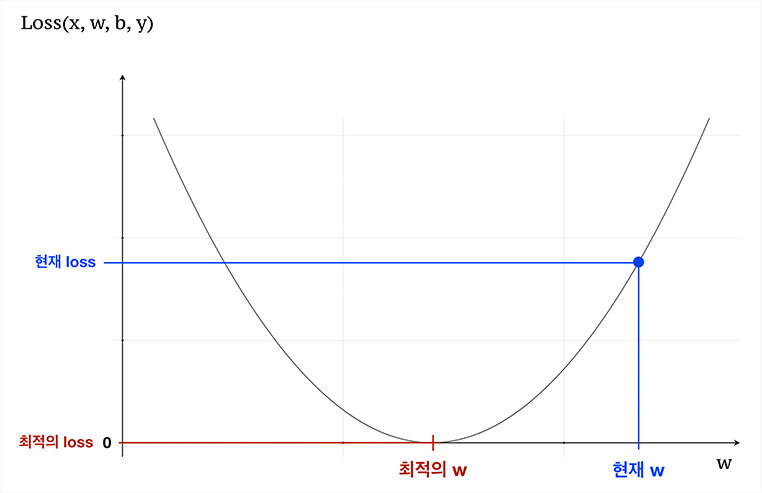

* x축 : w
* y축 : loss

현재의 w를 최적의 w로 옮기는 방법 --> Gradient Descent

* w가 최적의 w보다 작다면 w를 늘린다.
* w가 최적의 w보다 크다면 w를 늘린다.

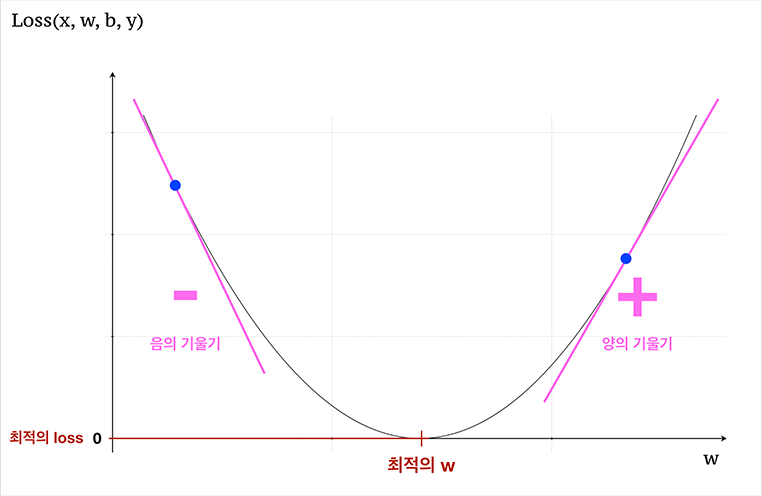

* w가 최적값보다 작을때, 커질수록 loss가 점점 작아지기 때문에 접선의 기울기가 음수
* w가 최적값보다 클 때, 커질수록 loss가 점점 커지므로 접선의 기울기가 양수

\to 특정 점에서의 기울기는 항상 자기자신보다 함수값이 작아지는 방향을 알려줄 수 있다.

1. 현재 w에서 기울기를 구한다.
2. 기울기가 음수라면, 현재 w를 키운다.
3. 기울기가 양수라면, 현재 w를 줄인다.

$$w\prime = w -\eta g$$
* w\prime : 새로운 w
* w : 현재 w
* $\eta$ : 학습률(얼마나 업데이트할지를 결정하는 함수)
* g : gradienet, 기울기

w에서 기울기를 빼주면 원하는 대로 동작할수있다.
g가 음수면 w-g의 값이 커진다.
g가 양수면 w-g의 값이 작아진다.

$\eta$는 고정되어있는 상수로서 w를 변화시키는 양을 조절한다.
g는 키울지, 줄일지에 대한 방향과 크기를 $\eta$는 얼마나 키울지 줄일지 배율을 결정한다.

#### 수치미분
0에 무한히 가까워져야 극한을 구할 수 있지만 0.0001같이 매우 작을 값을 두고 계산하여 근사값을 구할 수 있다.
수학적으로 정확한 값은 아니지만 근사한 미분계수를 찾는 방법을 수치미분이라고 한다.

In [23]:
def gradient(x, w, b, y):
    dw = (loss(x, w+0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b+0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db
print("슝=3")

슝=3


### 정의된 손실함수와 기울기 함수로 모델을 학습시켜 최적화하기
#### 하이퍼 파라미터
모델이 스스로 학습해나가는 파라미터가 아니라, 사람이 직접 사전에 정하고 시작해야하는 파라미터를 하이퍼 파라미터라고 한다.

In [24]:
LEARNING_RATE = 1 # 학습률
print("슝=3")

슝=3


1. 입력데이터 x와 정답데이터 y 준비
2. w, b 랜덤하게 선택
3. 현재 w,b로 모델의 prediction을 구하고, y값과 비교해서 loss funciton계산
4. loss function, 그 점에서 gradient 계산
5. 계산된 gradient로 w,b 업데이트
6. 3~5의 과정을 손실함수가 줄어들때까지 반복

In [25]:
x = macbook["used_years"].values
y = macbook["price"].values
print("슝=3")

슝=3


In [26]:
# 초기 가중치 랜덤 설정
w = 3.1
b = 2.3
w,b

(3.1, 2.3)

In [27]:
# 손실함수값이 단계별로 얼마정도인지를 저장할 losses라는 빈리스트 생성
losses = []
print("슝=3")

슝=3


In [28]:
for i in range(1,2001):
    dw, db =gradient(x, w, b, y)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(x, w, b, y)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 108.0080
Iteration 200 : Loss 94.5709
Iteration 300 : Loss 81.8560
Iteration 400 : Loss 70.1799
Iteration 500 : Loss 59.9778
Iteration 600 : Loss 51.7475
Iteration 700 : Loss 45.8356
Iteration 800 : Loss 42.1474
Iteration 900 : Loss 40.1357
Iteration 1000 : Loss 39.1420
Iteration 1100 : Loss 38.6793
Iteration 1200 : Loss 38.4703
Iteration 1300 : Loss 38.3772
Iteration 1400 : Loss 38.3360
Iteration 1500 : Loss 38.3179
Iteration 1600 : Loss 38.3099
Iteration 1700 : Loss 38.3064
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038


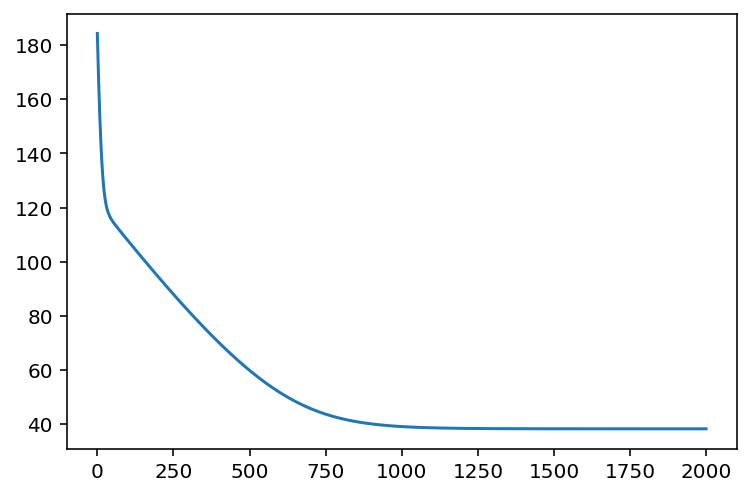

In [29]:
plt.plot(losses)
plt.show()

In [30]:
w, b

(-44.92756090768412, 293.0815786721102)

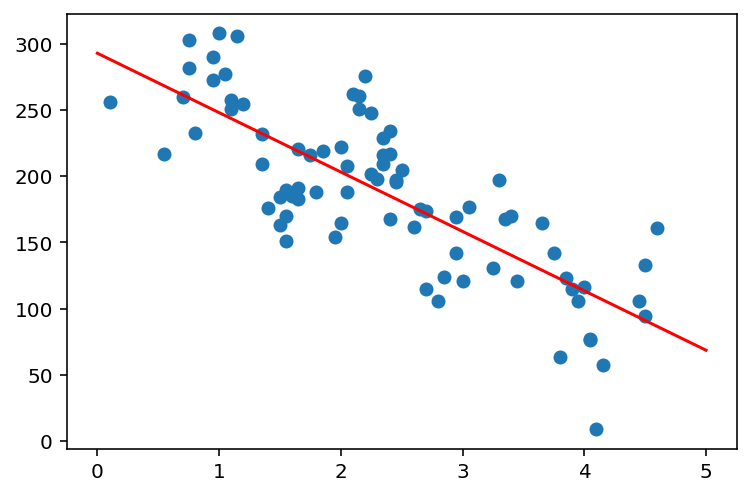

In [31]:
# 모델에 넣을 x값들 준비
x = np. linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c='r')

# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [32]:
test = pd.read_csv("~/aiffel/bike_regression/data/macbook_test.csv")
print(test.shape)
test.head()

(20, 2)


,used_years,price
0,1.20,203
1,1.85,206
2,2.40,191
3,2.85,164
4,3.05,176


In [33]:
test_x = test['used_years'].values
test_y = test['price'].values

In [34]:
prediction = model(test_x, w, b)
test['prediction'] = prediction
test

,used_years,price,prediction
0,1.20,203,239.168506
1,1.85,206,209.965591
2,2.40,191,185.255432
3,2.85,164,165.038030
4,3.05,176,156.052518
5,3.35,136,142.574250
6,2.55,133,178.516298
7,2.60,181,176.269920
8,2.50,181,180.762676
9,3.10,86,153.806140


In [35]:
test['error'] = test['price'] - test['prediction']
test

,used_years,price,prediction,error
0,1.20,203,239.168506,-36.168506
1,1.85,206,209.965591,-3.965591
2,2.40,191,185.255432,5.744568
3,2.85,164,165.038030,-1.038030
4,3.05,176,156.052518,19.947482
5,3.35,136,142.574250,-6.574250
6,2.55,133,178.516298,-45.516298
7,2.60,181,176.269920,4.730080
8,2.50,181,180.762676,0.237324
9,3.10,86,153.806140,-67.806140


In [36]:
rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5
rmse

45.03918284717212

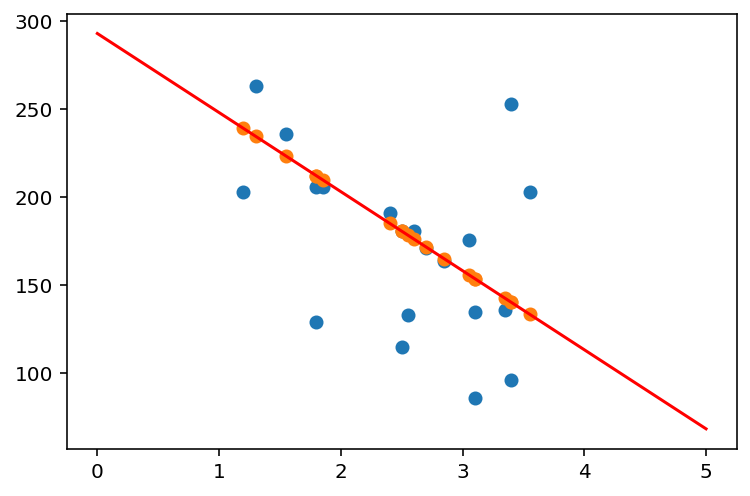

In [37]:
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()

### 다변수 선형회귀

In [38]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [39]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [41]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


In [42]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
print("슝=3")

슝=3


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(195, 12) (195,)
(49, 12) (49,)


In [44]:
import numpy as np
W = np.random.rand(12)
b = np.random.rand()
print("슝=3")

슝=3


In [45]:
W

array([0.54265594, 0.52587111, 0.86050652, 0.46545759, 0.00837378,
       0.24965255, 0.48268041, 0.34061884, 0.14015542, 0.28411723,
       0.50727308, 0.23193148])

In [46]:
b

0.32778542497832386

In [47]:
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("슝=3")
    
    

슝=3


In [48]:
def MSE(a,b):
    mse = ((a - b) ** 2).mean()
    return mse
print("슝=3")

슝=3


In [49]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


In [50]:
def gradient(X, W, b, y):
    # N은 데이터 포인터 개수
    
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
print("슝=3")

슝=3


In [51]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [504.98771483  61.1411332   14.74477156   7.03808426   8.49386051
  13.28899531   5.21756905   1.46612896   7.83690778   7.26225004
   5.56552377  16.21733206]
db: 21.782855823039963


In [52]:
LEARNING_RATE = 0.0001

In [53]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 ==0:
        print('Iteration %d : Loss %0.4f' %(i,L))

Iteration 10 : Loss 18.7465
Iteration 20 : Loss 3.7073
Iteration 30 : Loss 1.8321
Iteration 40 : Loss 1.5970
Iteration 50 : Loss 1.5662
Iteration 60 : Loss 1.5608
Iteration 70 : Loss 1.5587
Iteration 80 : Loss 1.5570
Iteration 90 : Loss 1.5553
Iteration 100 : Loss 1.5536
Iteration 110 : Loss 1.5519
Iteration 120 : Loss 1.5503
Iteration 130 : Loss 1.5486
Iteration 140 : Loss 1.5470
Iteration 150 : Loss 1.5454
Iteration 160 : Loss 1.5437
Iteration 170 : Loss 1.5421
Iteration 180 : Loss 1.5405
Iteration 190 : Loss 1.5389
Iteration 200 : Loss 1.5373
Iteration 210 : Loss 1.5357
Iteration 220 : Loss 1.5341
Iteration 230 : Loss 1.5325
Iteration 240 : Loss 1.5310
Iteration 250 : Loss 1.5294
Iteration 260 : Loss 1.5278
Iteration 270 : Loss 1.5263
Iteration 280 : Loss 1.5247
Iteration 290 : Loss 1.5232
Iteration 300 : Loss 1.5217
Iteration 310 : Loss 1.5201
Iteration 320 : Loss 1.5186
Iteration 330 : Loss 1.5171
Iteration 340 : Loss 1.5156
Iteration 350 : Loss 1.5141
Iteration 360 : Loss 1.5126


<function matplotlib.pyplot.show(close=None, block=None)>

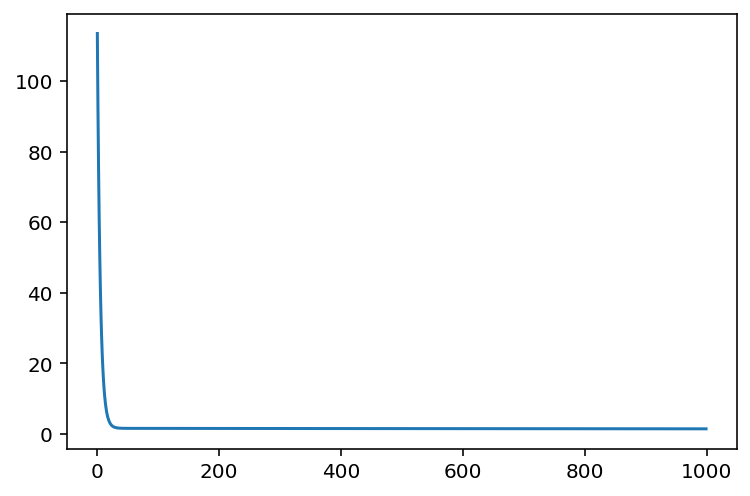

In [54]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show

In [55]:
W, b

(array([ 0.03399887,  0.38321387,  0.81182418,  0.44861983, -0.00585259,
         0.19835882,  0.44438376,  0.33509785,  0.13136908,  0.2712011 ,
         0.46457398,  0.20911048]),
 0.26226531937820874)

In [56]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

1.177507525057961

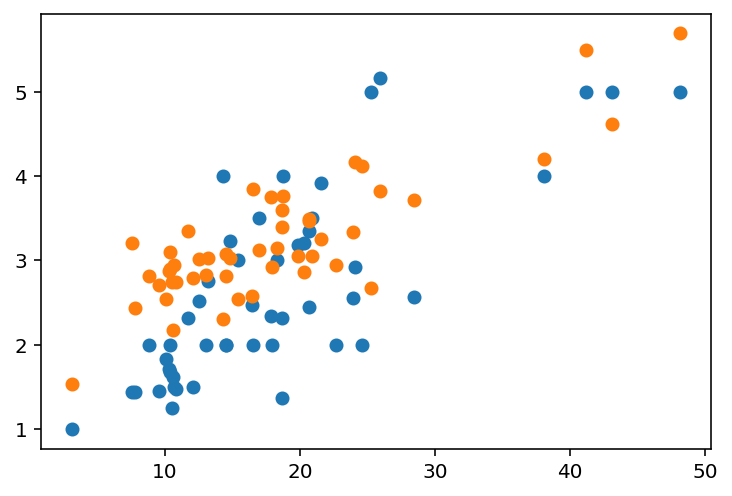

In [57]:
# prediction과 y_test 비교
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

#### 모델설계, 손실함수 정의, 기울기 계산 및 최적화 과정을 sklearn으로 진행하기

In [62]:
# 데이터준비
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
            'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner','tip']]
print("슝=3")

슝=3


In [58]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
print("슝=3")

슝=3


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("슝=3")

슝=3


In [60]:
# 준비된 모델을 가져다 쓰기
from sklearn.linear_model import LinearRegression
model = LinearRegression()
print("슝=3")

슝=3


In [61]:
# 입력데이터 X_train과 y_train을 넣어 fit 시킨다.
model.fit(X_train, y_train)

LinearRegression()

In [62]:
predictions = model.predict(X_test)
predictions

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [63]:
# 정답데이터와 비교
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

0.7033566017436103

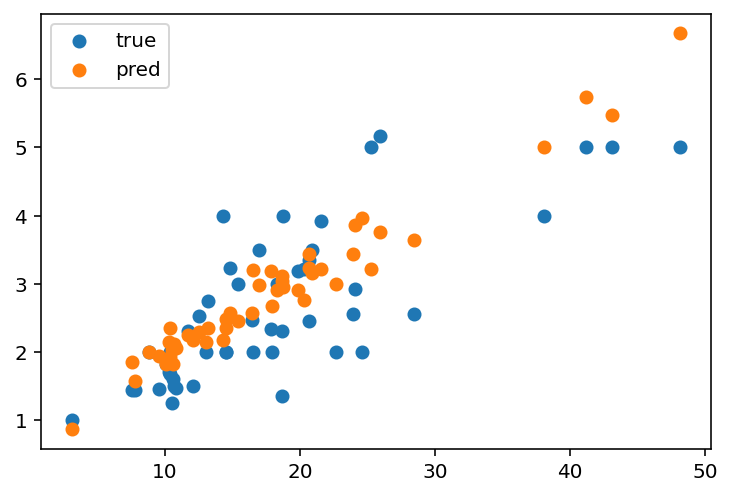

In [64]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

* 입력데이터 X, 정답데이터 y, 모델의 출력인 prediction 각각의 개념을 알고, 정답데이터에 가까운 출력을 낼 수 있도록 학습한다.
* 손실함수 적용, 손실함수의 미분값은 손실함수를 줄이기 위해서 구하며, 수치미분과 해석미분 두가지 방법으로 진행할 수 있다.
* 선형회귀의 전체 프로세스
* 사이킷 런을 활용하여 빠르게 선형회귀를 진행할 수 있다.

## 프로젝트1 : 당뇨병 수치 예측

### (1) 데이터가져오기

In [285]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

df_X = diabetes.data
df_y = diabetes.target

print(type(df_X))
print(type(df_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### (2) 모델에 입력할 데이터 X 준비하기

In [286]:
# df_X에 있는 값들을 numpy array로 변환해서 저장
df_X = np.array(df_X)
print(df_X)


[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


### (3) 모델에 예측할 데이터 y 준비하기

In [287]:
# df_y에 있는 값들을 numpy array로 변환해서 저장
df_y = np.array(df_y)
print(df_y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

### (4) train 데이터와 test 데이터로 분리하기

In [375]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=23)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 10)
(111, 10)
(331,)
(111,)


### (5) 모델 준비하기

In [376]:
# 입력데이터 개수에 맞는 가중치 w와 b 준비, 모델함수 구현
W = np.random.rand(10)
b = np.random.rand()
print(W)
print(b)

[0.67301159 0.30457972 0.11921971 0.89316377 0.87800541 0.92068745
 0.30499905 0.31788449 0.02480607 0.98167137]
0.7461767343798849


In [377]:
def regression_model(X, W, b):
    y = np.dot(X, W) + b
    return y

### (6) 손실함수 loss 정의하기

In [380]:
# 손실함수를 MSE로 정의
def MSE(s,t):
    MSE = ((s - t) ** 2).mean()
    return MSE


In [381]:
def loss(X, W, b, y):
    predictions = regression_model(X, W, b)
    L = MSE(predictions, y)
    return L

### (7) 기울기를 구하는 gradient 함수 구현

In [382]:
def gradient(X, W, b, y):
    # N은 데이터 포인터 개수
    
    N = len(y)
    
    # y_pred 준비
    y_pred = regression_model(X, W, b)
    
    # gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

### (8) 학습률(하이퍼파라미터) 설정

In [383]:
LEARNING_RATE = 0.008

### (9) 모델 학습하기

In [386]:
losses = []

for i in range(1, 27501):
    dW, db = gradient(X_train, W, b, y_train)
   
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 ==0:
        print('Iteration %d : Loss %0.4f' %(i,L))

Iteration 10 : Loss 3055.5719
Iteration 20 : Loss 3055.4484
Iteration 30 : Loss 3055.3251
Iteration 40 : Loss 3055.2018
Iteration 50 : Loss 3055.0786
Iteration 60 : Loss 3054.9555
Iteration 70 : Loss 3054.8325
Iteration 80 : Loss 3054.7096
Iteration 90 : Loss 3054.5867
Iteration 100 : Loss 3054.4640
Iteration 110 : Loss 3054.3413
Iteration 120 : Loss 3054.2187
Iteration 130 : Loss 3054.0962
Iteration 140 : Loss 3053.9738
Iteration 150 : Loss 3053.8515
Iteration 160 : Loss 3053.7293
Iteration 170 : Loss 3053.6071
Iteration 180 : Loss 3053.4851
Iteration 190 : Loss 3053.3631
Iteration 200 : Loss 3053.2412
Iteration 210 : Loss 3053.1194
Iteration 220 : Loss 3052.9976
Iteration 230 : Loss 3052.8760
Iteration 240 : Loss 3052.7545
Iteration 250 : Loss 3052.6330
Iteration 260 : Loss 3052.5116
Iteration 270 : Loss 3052.3903
Iteration 280 : Loss 3052.2691
Iteration 290 : Loss 3052.1480
Iteration 300 : Loss 3052.0269
Iteration 310 : Loss 3051.9060
Iteration 320 : Loss 3051.7851
Iteration 330 : L

### (10) test 데이터에 대한 성능 확인하기

In [387]:
test_prediction = regression_model(X_test, W, b)
final_loss = MSE(test_prediction, y_test)
final_loss

2959.363592058509

* MSE : 2959.36

### (11) 정답 데이터와 예측한 데이터 시각화 하기

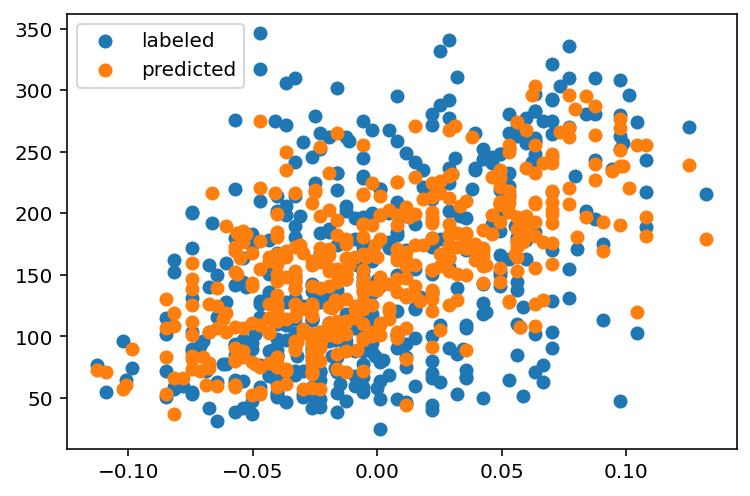

In [220]:
fig = plt.figure()

plt.scatter(df_X[:,3], df_y, label= 'labeled')
plt.scatter(df_X[:,3], regression_model(df_X,W,b), label = 'predicted')
plt.legend()

plt.show()

파란색은 실제값, 주황색은 predicted 값을 나타낸다. 

## 프로젝트2 : 월요일 오후 세시, 자전거 타는 사람은?

* 캐글 경진대회에서 제공한 데이터셋
* 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량을 예측
* sklearn(사이킷런)의 LinearRegression 모델 활용

### (1) 데이터 가져오기

In [223]:
import pandas as pd

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### (2) datetime 컬럼을 datetime 자료형으로 반환하고, 
###      연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [225]:
train['datetime'] = pd.to_datetime(train['datetime'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [226]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [227]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [232]:
# 'season'과 'weather'은 dummy 변수 처리한다.
train_dummy = pd.get_dummies(train, columns = ['season', 'weather'])

### (3) year, month, day, hour, minute, second 데이터 개수 시각화

* sns.countplot으로 시각화
* subplot으로 한번에 6개 그래프로 시각화

In [233]:
datetime_cols = ['year', 'month', 'day', 'hour', 'minute', 'second']

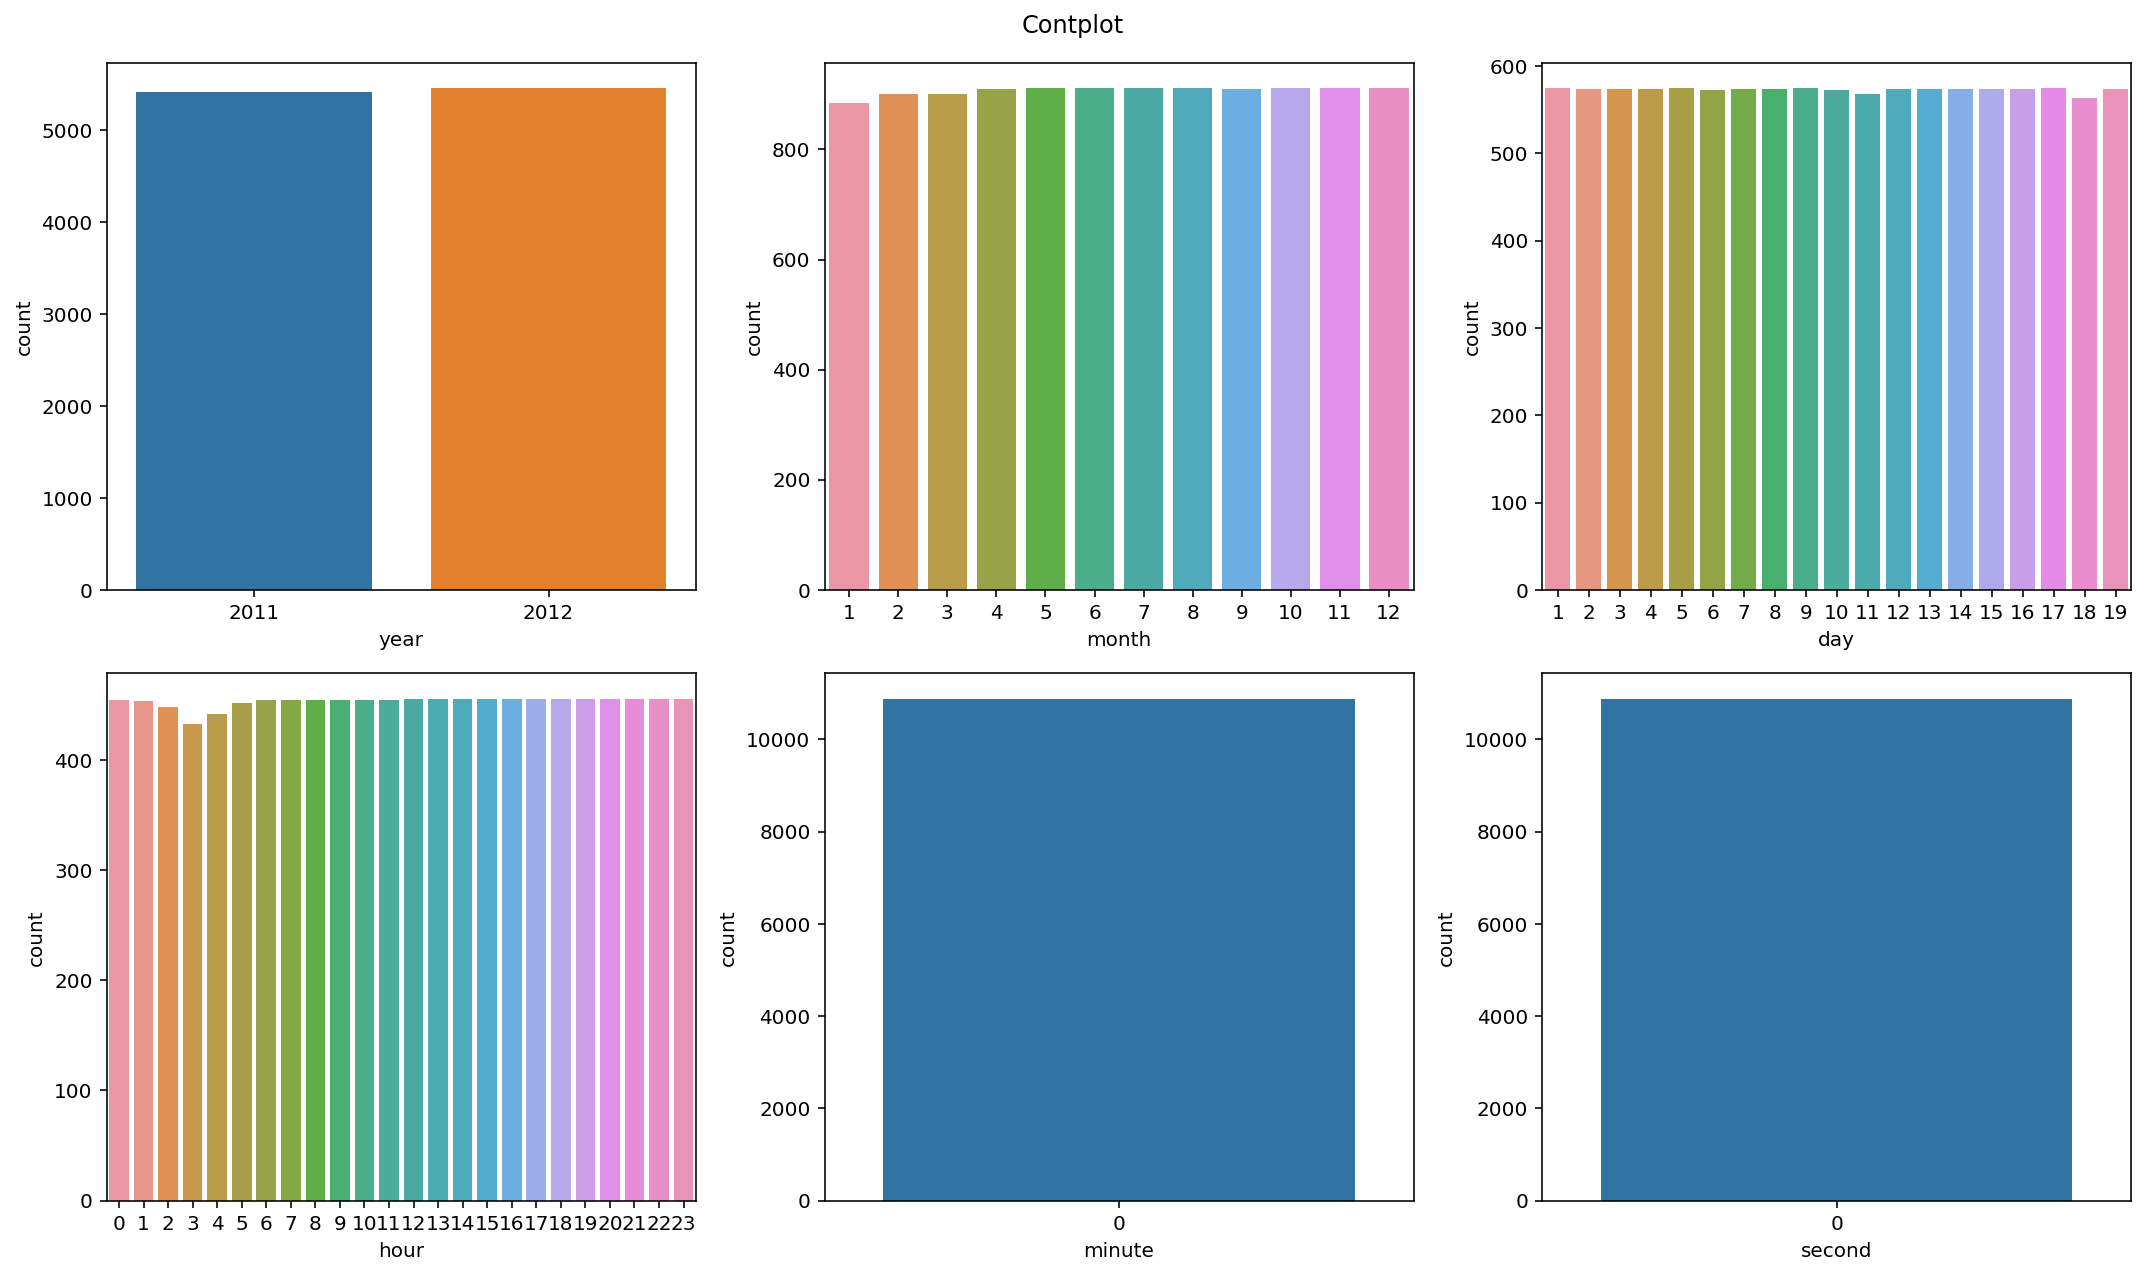

In [234]:
fig = plt.figure(figsize = (15, 9))

for i, col in enumerate(datetime_cols):
    ax = fig.add_subplot(2, 3, i+1)
    sns.countplot(data = train_dummy, x = col)
    
plt.suptitle('Contplot')
plt.tight_layout()
plt.show()

* 'minute'과 'second'는 유의미한 연관성을 보이지 않았다.

### (4) X, y 컬럼 선택 및 train, test 데이터분리

In [235]:
train_dummy.corr()['count'].abs().sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
humidity      0.317371
year          0.260403
season_1      0.237704
month         0.166862
season_3      0.136942
weather_3     0.117519
weather_1     0.105246
windspeed     0.101369
season_2      0.075681
weather_2     0.041329
season_4      0.023704
day           0.019826
workingday    0.011594
holiday       0.005393
weather_4     0.001459
minute             NaN
second             NaN
Name: count, dtype: float64

In [236]:
# 상관계수가 높은 컬럼을 제거해준다.
df_X = train_dummy.drop(['count', 'registered', 'casual', 'minute', 'second', 'datetime'], axis=1)
df_X

,holiday,workingday,temp,atemp,humidity,windspeed,year,month,day,hour,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0000,2011,1,1,0,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0000,2011,1,1,1,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0000,2011,1,1,2,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0000,2011,1,1,3,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0000,2011,1,1,4,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,19.695,50,26.0027,2012,12,19,19,0,0,0,1,1,0,0,0
10882,0,1,14.76,17.425,57,15.0013,2012,12,19,20,0,0,0,1,1,0,0,0
10883,0,1,13.94,15.910,61,15.0013,2012,12,19,21,0,0,0,1,1,0,0,0
10884,0,1,13.94,17.425,61,6.0032,2012,12,19,22,0,0,0,1,1,0,0,0


In [237]:
# y변수에 'count' 컬럼 넣기
df_y = train['count']
df_y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [241]:
print('df_X : ',type(df_X), df_X.shape)

df_X :  <class 'pandas.core.frame.DataFrame'> (10886, 18)


In [242]:
print('df_y: ', type(df_y), df_y.shape)

df_y:  <class 'pandas.core.series.Series'> (10886,)


In [244]:
# train 데이터와 test데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=40)

print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (8708, 18)
X_test (2178, 18)
y_train (8708,)
y_test (2178,)


### (5) LinearRegression 모델 학습

In [245]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [250]:
# MSE, RMSE
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE = MSE ** 0.5
print('MSE : ', MSE, ',RMSE : ', RMSE)

MSE :  19564.046406780442 ,RMSE :  139.87153537006893


* RMSE가 140정도의 값을 보였다.

### (7) x축은 temp 또는 humidity로, y축은 count로 예측결과 시각화하기

In [252]:
df_X.head(3)

,holiday,workingday,temp,atemp,humidity,windspeed,year,month,day,hour,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0,2011,1,1,0,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0,2011,1,1,1,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0,2011,1,1,2,1,0,0,0,1,0,0,0


['holiday',
 'workingday',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'hour',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4']

* 'temp'는 index가 2이고, humidity는 index가 4이다.

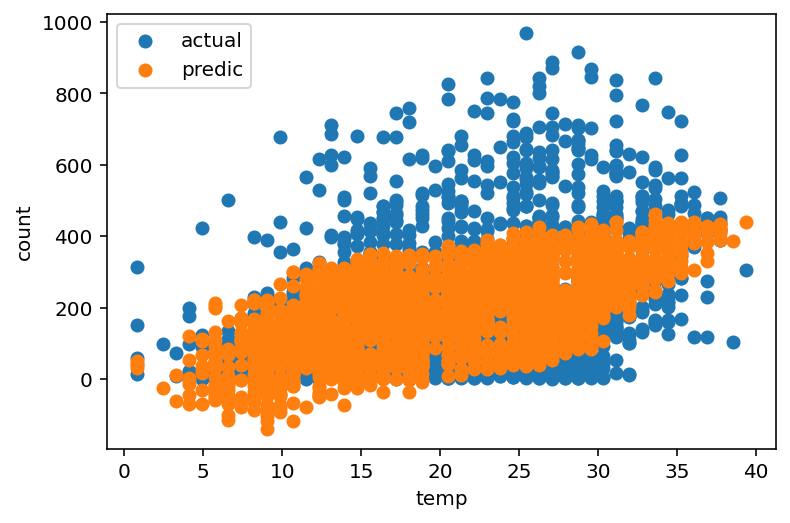

In [283]:
plt.scatter(X_test['temp'], y_test, label='actual')
plt.scatter(X_test['temp'], y_pred, label='predic')
plt.xlabel('temp')
plt.ylabel('count')
plt.legend()
plt.show()


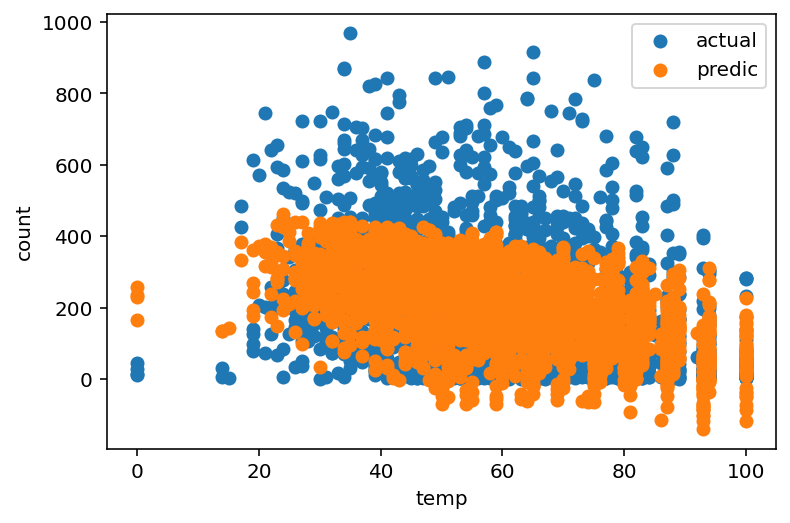

In [284]:
plt.scatter(X_test['humidity'], y_test, label='actual')
plt.scatter(X_test['humidity'], y_pred, label='predic')
plt.xlabel('temp')
plt.ylabel('count')
plt.legend()
plt.show()

## 회고

* 생각보다 변수가 많아서 특히 시각화를 하는데 어려움을 겪었다. matplotlib의 더 많은 기능을 공부해서, 더 효과적이고 보기 좋은 그래프(산점도)를 그려보고 싶다.

* 데이터 튜닝 과정에서 상당히 오랜 시간이 걸렸다.

## Reference

* https://yhyun225.tistory.com/11
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime
